In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data= pd.read_csv('./spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Clean the text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', ' ', text)  # Remove numbers
    text = text.lower()              # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    return text

# Apply cleaning
data['email'] = data['email'].apply(lambda x: clean_text(str(x)))

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['email']).toarray()
y = data['label']  # Target variable


In [4]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
# print(y_pred)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 96.22%
Confusion Matrix:
[[745   0]
 [ 34 121]]


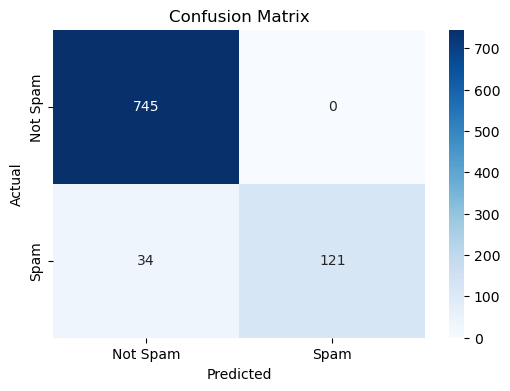

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
import numpy as np

# Get feature probabilities
feature_names = vectorizer.get_feature_names_out()
class_probs = model.feature_log_prob_

# Top features for each class
top_spam_words = np.argsort(class_probs[1])[-10:]
top_non_spam_words = np.argsort(class_probs[0])[-10:]

print("Top Spam Words:")
print([feature_names[i] for i in top_spam_words])

print("Top Non-Spam Words:")
print([feature_names[i] for i in top_non_spam_words])


Top Spam Words:
['url', 'for', 'of', 'and', 'your', 'the', 'you', 'to', 'hyperlink', 'number']
Top Non-Spam Words:
['that', 'in', 'is', 'it', 'and', 'of', 'to', 'url', 'the', 'number']
